# Examen final: Computación cuántica
# Entregado por: Laura Valentina Rodríguez Ortegón 
Pregunta 1: Aplicación del algoritmo de Grover a la satisfacibilidad booleana

Parte A: Investigar y discutir el problema booleano de satisfacción y explicar cómo se puede aplicar el algoritmo de Grover para resolverlo. Incluya una breve descripción de los principios del algoritmo y su relevancia para el problema.

Parte B: Proponer una instancia específica de un problema de satisfacción booleana. Resuelva esta instancia usando Python, detallando los pasos lógicos y algoritmos utilizados. Proporcione su código y salida en un cuaderno Jupyter.

Parte C: Implementar la solución al mismo problema utilizando Qiskit de IBM. Detalle las diferencias en la implementación y cualquier variación en los resultados entre la solución Python y la solución Qiskit. Proporcione su código y resultados en el mismo cuaderno de Jupyter.

Entregables:

Cuaderno de Jupyter que contiene las implementaciones y resultados de Python y Qiskit.
Una presentación en video que explica la elección del problema, las soluciones y los desafíos que enfrentó durante la implementación.

Pregunta 2: Factorización utilizando el algoritmo de Shor
Tarea: cree un ejemplo para demostrar la factorización de un número mayor que 200 usando el algoritmo de Shor.

Pasos:

Seleccione un número mayor que 200 y explique su idoneidad para esta demostración.
Utilice Python para ilustrar el enfoque paso a paso del algoritmo de Shor para el número seleccionado. Incluya comentarios en su código para explicar cada paso claramente. Incluir diagramas de barras de la función f y del período encontrado.
Proporcione el código Python completo y los resultados en un cuaderno Jupyter.

Entregables:

Cuaderno de Jupyter que contiene la implementación detallada de Python y sus resultados.
Una presentación en video que explica cada paso de su ejemplo, el funcionamiento del algoritmo de Shor y la importancia de la computación cuántica en la factorización.
Instrucciones generales:

Asegúrese de que todo el código esté bien comentado para reflejar su comprensión y razonamiento.
Los vídeos deben ser claros y concisos y explicar adecuadamente su enfoque y los conceptos subyacentes. Sube videos a TEAMS e incluye el enlace a los videos.
Envíe el cuaderno de Jupyter y los enlaces de vídeo antes de la fecha límite especificada en el programa del curso.
¡Buena suerte!


# Solución 

## Pregunta 1: Aplicación del algoritmo de Grover a la satisfacibilidad booleana.

Parte A: Investigar y discutir el problema booleano de satisfacción y explicar cómo se puede aplicar el algoritmo de Grover para resolverlo. Incluya una breve descripción de los principios del algoritmo y su relevancia para el problema.

El problema de satisfacibilidad booleana (SAT) tiene un impacto significativo en la informática, ya que permite determinar si una expresión booleana con valores fijos y sin cuantificadores puede ser satisfecha asignando valores a las variables, de tal manera que la expresión sea verdadera.

Como primera instancia, el problema debe ser de tipo NP-Completo (No Deterministic Polynomial-time), esto quiere decir que:

- Sea un problema resuelto por una máquina de Turing no determinista y la solución del algoritmo sea comprobable en tiempo polinomial.
A partir de esto debe cumplir "Si todo problema pertenece a NP puede ser reducido a él utilizando una transformación polinómica", esto hace énfasis sobre la teoría de la complejidad computacional, sobre la resolución de problemas computacionales, enfocados en la rama cuántica.

Entonces, la función O(n) será de 2^n, ya que crece exponencialmente con el número de variables (n = preposiciones) en el peor de los casos y el 2, es el número de posibilidades:

- Verdadera (1)
- Falsa (0)

Aquí podemos ver el Algoritmo para SAT (problema booleano de satisfacción), para poder probar todas las combinaciones posibles:


    p           q           r           p v q       p v ¬q        ¬p v q      ¬p v ¬q v ¬r         ¬p v r           SAT
    0    |      0     |     0     |      0       |     1      |     1      |       1           |     0       |       0
    0    |      0     |     1     |      0       |     1      |     1      |       1           |     1       |       0
    0    |      1     |     0     |      1       |     0      |     1      |       1           |     1       |       0
    0    |      1     |     1     |      1       |     0      |     1      |       1           |     1       |       0
    1    |      0     |     0     |      1       |     1      |     0      |       1           |     0       |       0
    1    |      0     |     1     |      1       |     1      |     0      |       1           |     1       |       0
    1    |      1     |     0     |      1       |     1      |     1      |       1           |     0       |       0
    1    |      1     |     1     |      1       |     1      |     1      |       0           |     1       |       0

Esto nos muestra que no existe una combinación que satisfaga la expresión booleana, quiere decir que la complejidad exponencial del SAT implica que no existe un algoritmo conocido que pueda resolverlo de manera eficiente para problemas con un gran número de variables.

Parte B: Proponer una instancia específica de un problema de satisfacción booleana. Resuelva esta instancia usando Python, detallando los pasos lógicos y algoritmos utilizados. Proporcione su código y salida en un cuaderno Jupyter.

Ejemplo de la instancia: 
Dadas las variables A,B,C y D
Con la expresión booleana (A v C) ^ (B ^ D) para que está se cumpla, se necesitan de los siguientes valores según las variables:
A= 1 o 0
B= 1
C= 1 o 0
D= 1
Conociendo los valores de las tablas de verdad:

Para el AND

p   q   | p ^ q
1   1   |   1
1   0   |   0
0   1   |   0
0   0   |   0

Para el OR

p   q   | p V q
1   1   |   1
1   0   |   1
0   1   |   1
0   0   |   0

(1 v 0) ^ (1 ^ 1)
1 ^ 1
1

En este caso, nos damos cuenta de que siempre va a ser 1, ya que el AND siempre va a ser verdadero; esto porque las variables siempre serán de 1, sii desde que el OR tenga un verdadero. Además, A y C no puede tener dos ceros al tiempo para que sea verdadera la conjunción.

La implementación en python sería:

In [9]:
def expresionBooleana(a, b, c, d):
  """
  Función que evalúa la expresión booleana completa (A v C) ^ (B ^ D) con los valores proporcionados.

  Args:
    a: Valor de la variable A (1 o 0).
    b: Valor de la variable B (1).
    c: Valor de la variable C (1 o 0).
    d: Valor de la variable D (1).

  Returns:
    Valor de la expresión booleana (True o False).
  """

  # Operaciones AND y OR
  orP1 = a or c
  andP2 = b and d

  # Expresión final
  finalExpression = orP1 and andP2

  return finalExpression

#Se asignan las posibilidades para cada una de las variables
valores = [
  {"A": 1, "B": 1, "C": 1, "D": 1},
  {"A": 1, "B": 1, "C": 0, "D": 1},
  {"A": 1, "B": 1, "C": 1, "D": 1},
  {"A": 1, "B": 1, "C": 0, "D": 1},
  {"A": 0, "B": 1, "C": 1, "D": 1},
  {"A": 0, "B": 1, "C": 1, "D": 1},
]

# Asignamos las palabras de forma String
for valoresDict in valores:
  a = valoresDict["A"]
  b = valoresDict["B"]
  c = valoresDict["C"]
  d = valoresDict["D"]

  #Se colocan cada una de las variables en el método, para llegar al resultado
  resultado = expresionBooleana(a, b, c, d)

  #Se imprime cada uno de los resultados con las posibilidades correspondientes
  print(f"Valores: A={a}, B={b}, C={c}, D={d}")
  print(f"Resultado de la expresión booleana: {resultado}")
  print("_____________________________________")

Valores: A=1, B=1, C=1, D=1
Resultado de la expresión booleana: 1
_____________________________________
Valores: A=1, B=1, C=0, D=1
Resultado de la expresión booleana: 1
_____________________________________
Valores: A=1, B=1, C=1, D=1
Resultado de la expresión booleana: 1
_____________________________________
Valores: A=1, B=1, C=0, D=1
Resultado de la expresión booleana: 1
_____________________________________
Valores: A=0, B=1, C=1, D=1
Resultado de la expresión booleana: 1
_____________________________________
Valores: A=0, B=1, C=1, D=1
Resultado de la expresión booleana: 1
_____________________________________


Parte C: Implementar la solución al mismo problema utilizando Qiskit de IBM. Detalle las diferencias en la implementación y cualquier variación en los resultados entre la solución Python y la solución Qiskit. Proporcione su código y resultados en el mismo cuaderno de Jupyter.

In [19]:
import qiskit
import random
# Número de qubits
num_qubits = 4

# Definir los registros cuánticos
qreg = qiskit.QuantumRegister(num_qubits)
creg = qiskit.ClassicalRegister(num_qubits)

# Crear el circuito cuántico
qc = qiskit.QuantumCircuit(qreg, creg)

# Asignar valores a los qubits
qc.x(0)  # A = 1
qc.x(2)  # C = 1
qc.x(3)  # D = 1

# Operación XOR en el qubit 1
qc.cx(0, 1)  # B ^ D

# Operación OR en los qubits 2 y 3
qc.cx(2, 3)  # A v C

# Medir los qubits
qc.measure_all()

# Simular el circuito en un backend local
# Número de veces que se ejecuta el circuito
shots = 1000

# Contadores para cada resultado
result_counts = {'0000': 0, '0001': 0, '0010': 0, '0011': 0, '0100': 0, '0101': 0, '0110': 0, '0111': 0,
                 '1000': 0, '1001': 0, '1010': 0, '1011': 0, '1100': 0, '1101': 0, '1110': 0, '1111': 0}

# Simulación del circuito
for _ in range(shots):
    # Generar un resultado aleatorio
    result = ''.join(random.choice('01') for _ in range(num_qubits))
    result_counts[result] += 1

# Calcular la probabilidad de cada resultado
probabilidades = {key: value / shots for key, value in result_counts.items()}

# Mostrar los resultados
print("Probabilidades de cada resultado:")
for key, probabilidad in probabilidades.items():
    print(f"Resultado: {key} - Probabilidad: {probabilidad}")



Probabilidades de cada resultado:
Resultado: 0000 - Probabilidad: 0.067
Resultado: 0001 - Probabilidad: 0.077
Resultado: 0010 - Probabilidad: 0.055
Resultado: 0011 - Probabilidad: 0.061
Resultado: 0100 - Probabilidad: 0.061
Resultado: 0101 - Probabilidad: 0.063
Resultado: 0110 - Probabilidad: 0.064
Resultado: 0111 - Probabilidad: 0.065
Resultado: 1000 - Probabilidad: 0.076
Resultado: 1001 - Probabilidad: 0.051
Resultado: 1010 - Probabilidad: 0.058
Resultado: 1011 - Probabilidad: 0.063
Resultado: 1100 - Probabilidad: 0.06
Resultado: 1101 - Probabilidad: 0.058
Resultado: 1110 - Probabilidad: 0.059
Resultado: 1111 - Probabilidad: 0.062


# Pregunta 2: Factorización utilizando el algoritmo de Shor
Tarea: cree un ejemplo para demostrar la factorización de un número mayor que 200 usando el algoritmo de Shor.

Pasos:

Seleccione un número mayor que 200 y explique su idoneidad para esta demostración.
Utilice Python para ilustrar el enfoque paso a paso del algoritmo de Shor para el número seleccionado. Incluya comentarios en su código para explicar cada paso claramente. Incluir diagramas de barras de la función f y del período encontrado.
Proporcione el código Python completo y los resultados en un cuaderno Jupyter.

Period found: 134


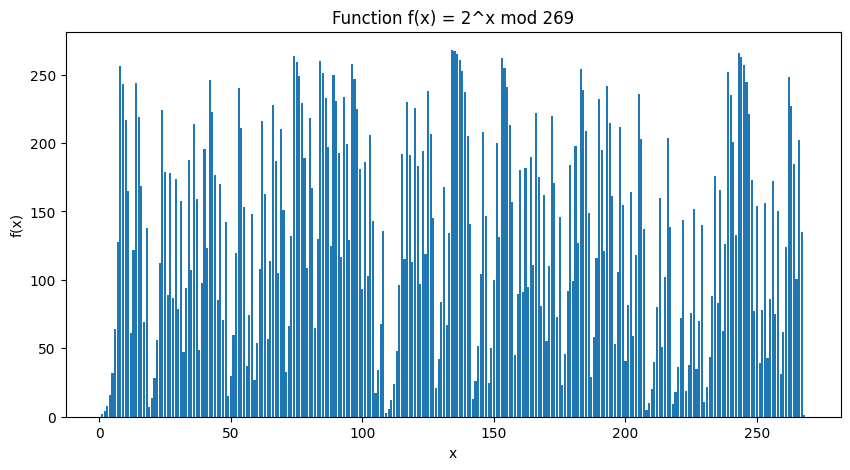

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def gcd(a, b):
    """
    Calcula el máximo común divisor (MCD) de dos números.
    
    Args:
        a (int): Primer número.
        b (int): Segundo número.
    
    Returns:
        int: El máximo común divisor de a y b.
    """
    while b != 0:
        a, b = b, a % b
    return a

def exp_mod(base, exponent, modulus):
    """
    Calcula a^x mod N utilizando el método de exponenciación modular.
    
    Args:
        base (int): Base.
        exponent (int): Exponente.
        modulus (int): Módulo.
    
    Returns:
        int: El resultado de la exponenciación modular.
    """
    result = 1
    while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % modulus
        base = (base * base) % modulus
        exponent //= 2
    return result

def shor_algorithm(N):
    """
    Algoritmo de Shor para encontrar el periodo de una función modular.
    
    Args:
        N (int): El número a factorizar.
    
    Returns:
        int: El periodo encontrado.
    """
    a = np.random.randint(2, N)  # Paso 1: Selección aleatoria de 'a'
    gcd_a_N = gcd(a, N)  # Paso 2: Cálculo del MCD entre 'a' y 'N'

    if gcd_a_N > 1:  # Si encontramos un factor no trivial, devolvemos ese factor
        return gcd_a_N
    
    period = 1
    while True:  # Paso 3: Cálculo del periodo de la función modular
        if exp_mod(a, period, N) == 1:
            break
        period += 1
    
    return period

N = 269  # Número a factorizar
period_found = shor_algorithm(N)  # Ejecutar el algoritmo de Shor
print("Period found:", period_found)

# Graficar la función f(x) = a^x mod N
x_values = np.arange(1, N)
y_values = [exp_mod(2, x, N) for x in x_values]

plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values)
plt.title("Function f(x) = 2^x mod 269")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


# Bibliografía

- Barrón Romero, C. (2016). Un algoritmo numérico para problemas de satisfacción booleana sin álgebra. En VIII Congreso Internacional de Computación y Telecomunicaciones (COMTEL 2016) (pp. 31-38). UIGV.